In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model

# import warnings
# warnings.filterwarnings('ignore', message='X does not have valid feature names')

In [2]:
df = pd.read_csv("data/house-prices.csv")
df

,area,price
0,1567,177067.50
1,3345,511748.20
2,3722,404096.67
3,2783,357916.31
4,2949,362409.54
...,...,...
995,3442,434336.51
996,1530,211400.14
997,2102,172513.03
998,1551,200701.84


In [3]:
# df["price"] = df["price"].astype(int)
# df

In [4]:
df.dtypes

area       int64
price    float64
dtype: object

Text(0, 0.5, 'Price (in $)')

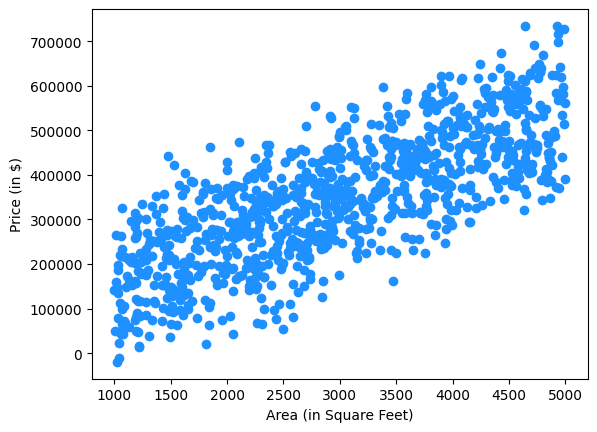

In [5]:
plt.scatter(df["area"], df["price"], color="dodgerblue")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

In [6]:
reg_obj = linear_model.LinearRegression()
reg_obj.fit(df[["area"]], df["price"])
df2 = pd.DataFrame({"area": df["area"]})
df2

,area
0,1567
1,3345
2,3722
3,2783
4,2949
...,...
995,3442
996,1530
997,2102
998,1551


In [7]:
predicted_arr = reg_obj.predict(df2)
for i in range(len(predicted_arr)):
    print(predicted_arr[i], end=", ")    

212322.90487090533, 384074.21961441165, 420491.6806145814, 329786.1212534158, 345821.3958582651, 405712.1805269793, 266417.80715232465, 360600.8959458672, 484342.98491461383, 276657.199369879, 509651.671339135, 204208.66952869244, 234540.45402220255, 453721.406301739, 447249.3376359263, 343503.0429033471, 179479.57134290074, 197253.61066393854, 329592.9251738393, 334519.42520304, 178996.5811439595, 325052.81730379164, 462222.0338031049, 158421.19866906252, 331138.4938104513, 504435.3771905696, 201020.93421568023, 198316.18910160926, 442419.4356465139, 287959.1700251041, 454977.1808189862, 259655.94436714723, 351520.6802057718, 277816.375847338, 225073.84612295416, 344179.2291818649, 527232.5145805962, 162091.924181016, 176485.03210946504, 259752.54240693548, 432663.03362790076, 489849.07318254403, 193293.09103262032, 259559.34632735897, 440101.0826915959, 170302.75756301713, 212999.09114942307, 286123.80726912734, 322251.4741499324, 510231.2595778645, 187497.2086453254, 175422.45367179

In [8]:
m = reg_obj.coef_ # ouputs the value of slope (m)
m

array([96.59803979])

In [9]:
c = reg_obj.intercept_
c

60953.776522719534

In [10]:
x = df2.to_numpy(df["area"])

In [11]:
# y = m * x + c
using_formula_arr = np.empty(1000)
for i in range(len(x)):
    using_formula_arr[i] = m * x[i] + c
    print(m * x[i] + c, end=", ")
# using_formula_arr

[212322.90487091], [384074.21961441], [420491.68061458], [329786.12125342], [345821.39585827], [405712.18052698], [266417.80715232], [360600.89594587], [484342.98491461], [276657.19936988], [509651.67133913], [204208.66952869], [234540.4540222], [453721.40630174], [447249.33763593], [343503.04290335], [179479.5713429], [197253.61066394], [329592.92517384], [334519.42520304], [178996.58114396], [325052.81730379], [462222.0338031], [158421.19866906], [331138.49381045], [504435.37719057], [201020.93421568], [198316.18910161], [442419.43564651], [287959.1700251], [454977.18081899], [259655.94436715], [351520.68020577], [277816.37584734], [225073.84612295], [344179.22918186], [527232.5145806], [162091.92418102], [176485.03210947], [259752.54240694], [432663.0336279], [489849.07318254], [193293.09103262], [259559.34632736], [440101.0826916], [170302.75756302], [212999.09114942], [286123.80726913], [322251.47414993], [510231.25957786], [187497.20864533], [175422.45367179], [315296.41528518], 

In [12]:
np.array_equal(predicted_arr, using_formula_arr)

True

In [13]:
df["predicted_price"] = predicted_arr
df

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234


Text(0, 0.5, 'Price (in $)')

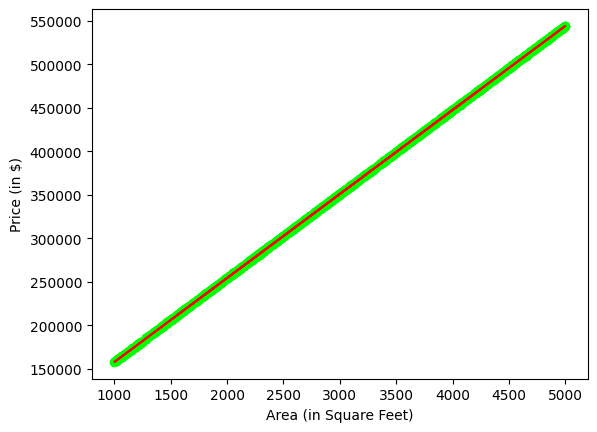

In [14]:
plt.plot(df["area"], df["predicted_price"], color="red")
plt.scatter(df["area"], df["predicted_price"], color="lime")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

Text(0, 0.5, 'Price (in $)')

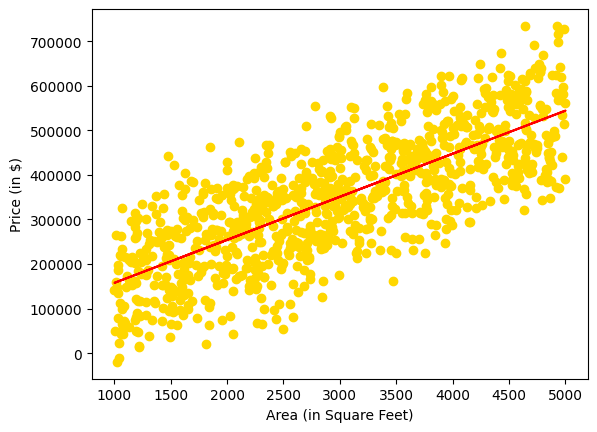

In [15]:
plt.scatter(df["area"], df["price"], color="gold")
plt.plot(df["area"], df["predicted_price"], color="red")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

In [16]:
df

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234
